# Install and Import Libraries

In [ ]:
# Install Data and Visualization Tools
!pip install pandas
!pip install yfinance
!pip install matplotlib
!pip install numpy
# Install Time Series Analysis and Machine Learning Libraries
!pip install scikit-learn
!pip install statsmodels
!pip install pmdarima
!pip install prophet

In [191]:
# Import Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pmdarima as pm
from prophet import Prophet

# Get Data

In [131]:
# Get the list of stock tickers
tickers = ['WMT', 'TGT', 'COST', 'HD', 'DG', 'LOW', 'TJX']
data=yf.download(tickers, start = '2014-01-01', end = '2025-01-01')
data

C:\Users\leonh\AppData\Local\Temp\ipykernel_22372\1259727014.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers, start = '2014-01-01', end = '2025-01-01')
[*********************100%***********************]  7 of 7 completed


Price            Close                                                 \
Ticker            COST         DG          HD         LOW         TGT   
Date                                                                    
2014-01-02   94.012115  53.548218   62.777782   40.045990   45.266071   
2014-01-03   93.597160  53.355736   62.678288   39.649094   45.488186   
2014-01-06   92.886978  52.157028   62.073627   39.090202   45.180096   
2014-01-07   92.456017  52.402012   62.379795   39.187397   45.072624   
2014-01-08   91.011642  52.235764   62.708900   39.325096   44.915005   
...                ...        ...         ...         ...         ...   
2024-12-24  955.192139  73.211266  391.210724  246.512604  129.796585   
2024-12-26  952.522278  74.182312  390.223175  245.734299  133.708115   
2024-12-27  936.144531  74.437340  387.971527  244.660446  132.835632   
2024-12-30  918.720703  74.241173  384.584198  243.074295  132.394485   
2024-12-31  912.803162  74.368683  384.149689  243.143265  132.521912   

Price                                    High                         ...  \
Ticker             TJX        WMT        COST         DG          HD  ...   
Date                                                                  ...   
2014-01-02   27.123999  20.899691   95.201137  53.915704   63.198753  ...   
2014-01-03   27.175270  20.830822   94.451018  54.046964   63.129874  ...   
2014-01-06   26.880447  20.714289   93.964274  53.661980   62.747180  ...   
2014-01-07   26.995813  20.777851   93.014613  52.865745   62.701260  ...   
2014-01-08   27.132540  20.613646   92.599656  52.550754   62.716556  ...   
...                ...        ...         ...        ...         ...  ...   
2024-12-24  122.719109  92.203255  955.750017  73.574186  391.210724  ...   
2024-12-26  124.229622  92.312691  955.779864  74.368677  390.855196  ...   
2024-12-27  123.166306  91.188515  946.853857  75.055278  390.549066  ...   
2024-12-30  120.334091  90.104111  930.635412  74.780640  386.342048  ...   
2024-12-31  120.055840  89.885246  921.241085  74.868923  386.588955  ...   

Price             Open                          Volume                     \
Ticker             TGT         TJX        WMT     COST       DG        HD   
Date                                                                        
2014-01-02   45.516832   27.072725  20.849368  1618400  6018200   4253400   
2014-01-03   45.581324   27.029993  20.873199  1293500  2697800   3897900   
2014-01-06   45.624301   27.269276  20.886445  2120200  4007800  11188800   
2014-01-07   45.158599   26.918902  20.703693  2292500  2584500   4630900   
2014-01-08   45.000982   27.038537  20.791100  4600000  4418700   4662300   
...                ...         ...        ...      ...      ...       ...   
2024-12-24  129.277008  121.228472  89.905140   939000  1542300   1392600   
2024-12-26  129.855399  122.679355  92.063977   969000  3600700   1319500   
2024-12-27  132.472913  123.146426  91.656091  1943400  2659700   1942700   
2024-12-30  131.757258  121.447102  90.263291  1881200  3775400   2444700   
2024-12-31  132.835627  121.129099  90.104116  1742900  3500400   2179700   

Price                                            
Ticker          LOW      TGT      TJX       WMT  
Date                                             
2014-01-02  5458300  7400100  4197000  20634000  
2014-01-03  4257500  4589400  3302600  14872200  
2014-01-06  4923000  4609600  6277000  21840600  
2014-01-07  5541900  5398300  6293800  15036900  
2014-01-08  4875800  5529900  6096000  17865600  
...             ...      ...      ...       ...  
2024-12-24   992100  1647700  1476100   8992400  
2024-12-26  1435200  5042000  2892800  10994000  
2024-12-27  1581100  3089000  3471500  11384400  
2024-12-30  1622800  3945600  3976600   9790200  
2024-12-31  1397900  2830200  3600100  11267700  

[2768 rows x 35 columns]

In [132]:
# Get the list of stock tickers
curr_data=yf.download(tickers, start = '2025-01-01', end = None)
curr_data

C:\Users\leonh\AppData\Local\Temp\ipykernel_22372\1274870986.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  curr_data=yf.download(tickers, start = '2025-01-01', end = None)
[*********************100%***********************]  7 of 7 completed


Price            Close                                                  \
Ticker            COST          DG          HD         LOW         TGT   
Date                                                                     
2025-01-02  906.367615   74.182320  383.626282  243.320602  134.492401   
2025-01-03  913.112000   73.240685  384.337311  244.798370  133.119919   
2025-01-06  919.218811   74.398102  384.524963  246.039703  136.551102   
2025-01-07  917.883850   73.320587  379.448914  242.916672  136.511902   
2025-01-08  923.861145   70.799797  382.381958  243.231934  135.502136   
...                ...         ...         ...         ...         ...   
2025-08-01  952.520020  108.529999  373.660004  226.399994   99.769997   
2025-08-04  955.369995  110.940002  380.820007  233.809998   99.790001   
2025-08-05  943.630005  110.860001  385.410004  237.460007  102.430000   
2025-08-06  968.559998  113.320000  386.799988  238.289993  105.389999   
2025-08-07  977.450012  115.629997  386.170013  238.559998  105.669998   

Price                                     High                          ...  \
Ticker             TJX         WMT        COST          DG          HD  ...   
Date                                                                    ...   
2025-01-02  120.393715   89.537041  922.267250   76.546192  387.783917  ...   
2025-01-03  119.976349   90.313034  920.713135   74.456954  386.144556  ...   
2025-01-06  120.125404   90.959686  923.900979   75.967474  389.087471  ...   
2025-01-07  119.390022   90.342873  927.786243   77.106727  387.023456  ...   
2025-01-08  120.890594   91.327789  926.979307   73.152538  382.865851  ...   
...                ...         ...         ...         ...         ...  ...   
2025-08-01  126.000000   98.489998  956.719971  109.029999  374.799988  ...   
2025-08-04  129.220001   99.589996  960.179993  111.230003  381.899994  ...   
2025-08-05  128.770004   99.309998  951.500000  111.650002  386.940002  ...   
2025-08-06  132.100006  103.360001  970.549988  114.300003  388.929993  ...   
2025-08-07  131.979996  103.120003  982.000000  115.830002  391.450012  ...   

Price             Open                           Volume                    \
Ticker             TGT         TJX         WMT     COST       DG       HD   
Date                                                                        
2025-01-02  133.080714  120.950217   89.517147  1765100  2673700  2415700   
2025-01-03  134.982568  120.791230   89.686277  1612200  3120000  2231600   
2025-01-06  134.325748  119.986279   90.362774  1970400  3234400  3274500   
2025-01-07  137.178524  120.334089   91.228294  1888000  3592200  2274300   
2025-01-08  136.266798  119.419830   90.641336  1774800  5786100  2848500   
...                ...         ...         ...      ...      ...      ...   
2025-08-01   99.519997  124.110001   98.000000  2934500  4216800  3008200   
2025-08-04  100.010002  126.419998   98.199997  2389900  3329000  2844300   
2025-08-05  100.059998  129.229996   99.669998  2462300  2972700  2931400   
2025-08-06  103.470001  128.910004   99.459999  2753000  2859600  2812800   
2025-08-07  106.500000  132.710007  103.459999  1891700  2678500  2433000   

Price                                            
Ticker          LOW      TGT      TJX       WMT  
Date                                             
2025-01-02  2741000  4358300  3424400  14820400  
2025-01-03  1889200  4025200  3897200  10834600  
2025-01-06  2573400  4937900  5963400  14519900  
2025-01-07  1803500  4166100  4500100  11238000  
2025-01-08  2364900  4663400  5219200  13453600  
...             ...      ...      ...       ...  
2025-08-01  3400900  5021700  4855400  16750400  
2025-08-04  3871300  5312700  4807800  19050200  
2025-08-05  3107000  5093400  5178400  17977000  
2025-08-06  2448700  6306600  4839400  23738400  
2025-08-07  1948300  4189200  6153800  12503900  

[149 rows x 35 columns]

In [133]:
monthly_data=data['Close'].asfreq('ME', method='pad')
wmt_data=monthly_data['WMT']
tgt_data=monthly_data['TGT']
cost_data=monthly_data['COST']
hd_data=monthly_data['HD']
dg_data=monthly_data['DG']
low_data=monthly_data['LOW']
tjx_data=monthly_data['TJX']

In [134]:
curr_monthly_data=curr_data['Close'].asfreq('ME', method='pad')
curr_wmt_data=curr_monthly_data['WMT']
curr_tgt_data=curr_monthly_data['TGT']
curr_cost_data=curr_monthly_data['COST']
curr_hd_data=curr_monthly_data['HD']
curr_dg_data=curr_monthly_data['DG']
curr_low_data=curr_monthly_data['LOW']
curr_tjx_data=curr_monthly_data['TJX']

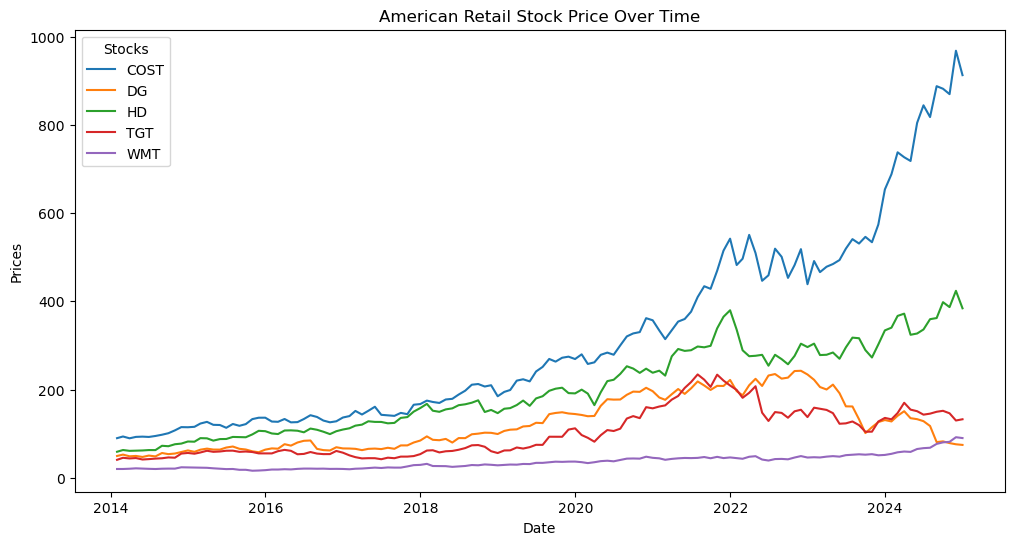

In [13]:
plt.figure(figsize=(12, 6))
for column in monthly_data.columns:
    plt.plot(monthly_data[column], label=column)
plt.title('American Retail Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.grid(False)
plt.legend(title='Stocks')
plt.show()

# Method 1: Manual ARIMA Model

In [79]:
def method1(data):
    model = ARIMA(data, order=(1,1,1))
    results = model.fit()
    forecast = results.forecast(steps=5)
    return forecast

In [80]:
def method1_custom(data, order_tuple):
    model = ARIMA(data, order=order_tuple)
    results = model.fit()
    forecast = results.forecast(steps=5)
    return forecast

In [108]:
m1_wmt_forecast = method1(wmt_data)
m1_wmt_forecast, curr_wmt_data.head()

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2025-01-31    91.711863
 2025-02-28    93.516823
 2025-03-31    95.300385
 2025-04-30    97.062802
 2025-05-31    98.804323
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    97.655075
 2025-02-28    98.102753
 2025-03-31    87.578255
 2025-04-30    97.015434
 2025-05-31    98.720001
 Freq: ME, Name: WMT, dtype: float64)

In [125]:
m1_tgt_forecast = method1(tgt_data)
m1_tgt_forecast, curr_tgt_data.head()

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2025-01-31    129.915170
 2025-02-28    131.896447
 2025-03-31    130.390559
 2025-04-30    131.535123
 2025-05-31    130.665187
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    135.198242
 2025-02-28    122.835732
 2025-03-31    103.180435
 2025-04-30     95.607010
 2025-05-31     94.010002
 Freq: ME, Name: TGT, dtype: float64)

In [135]:
m1_cost_forecast = method1(cost_data)
m1_hd_forecast = method1(hd_data)
m1_dg_forecast = method1(dg_data)
m1_low_forecast = method1(low_data)
m1_tjx_forecast = method1(tjx_data)

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\leonh\anaconda3\Lib\s

# Method 2: Auto ARIMA Model

In [117]:
def optimal_order(data):
    optimal_model = pm.auto_arima(data, start_p=0, start_q=0, seasonal=False, stepwise=False, suppress_warnings=True, error_action='ignore')
    return optimal_model.order
def seasonal_optimal(data):
    optimal_model = pm.auto_arima(data, start_p=0, start_q=0, seasonal=True, stepwise=False, suppress_warnings=True, error_action='ignore')
    return optimal_model.order

In [84]:
def method2(data):
    model = ARIMA(data, order=optimal_order(data))
    results=model.fit()
    forecast=results.forecast(steps=5)
    return forecast

In [110]:
m2_wmt_forecast = method2(wmt_data)
m2_wmt_forecast, curr_wmt_data.head()

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2025-01-31     92.630490
 2025-02-28     94.394456
 2025-03-31     96.390208
 2025-04-30     99.272137
 2025-05-31    101.995326
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    97.655075
 2025-02-28    98.102753
 2025-03-31    87.578255
 2025-04-30    97.015434
 2025-05-31    98.720001
 Freq: ME, Name: WMT, dtype: float64)

In [111]:
m2_tgt_forecast = method2(tgt_data)
m2_tgt_forecast, curr_tgt_data.head()

(2025-01-31    137.498458
 2025-02-28    132.825106
 2025-03-31    129.656170
 2025-04-30    129.821328
 2025-05-31    129.821328
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    135.198242
 2025-02-28    122.835732
 2025-03-31    103.180435
 2025-04-30     95.607010
 2025-05-31     94.010002
 Freq: ME, Name: TGT, dtype: float64)

In [112]:
m2_cost_forecast = method2(cost_data)
m2_cost_forecast, curr_cost_data.head()

(2025-01-31     924.589379
 2025-02-28     976.936803
 2025-03-31     987.568238
 2025-04-30     995.754453
 2025-05-31    1022.031834
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31     976.172485
 2025-02-28    1045.796753
 2025-03-31     943.242554
 2025-04-30     991.831848
 2025-05-31    1038.740967
 Freq: ME, Name: COST, dtype: float64)

In [120]:
m2_hd_forecast = method2(hd_data)
m2_hd_forecast, curr_hd_data.head()

(2025-01-31    381.508600
 2025-02-28    369.249280
 2025-03-31    378.973049
 2025-04-30    373.230875
 2025-05-31    382.870568
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    406.853638
 2025-02-28    391.665009
 2025-03-31    364.226471
 2025-04-30    358.263550
 2025-05-31    366.015381
 Freq: ME, Name: HD, dtype: float64)

In [136]:
m2_dg_forecast = method2(dg_data)
m2_dg_forecast, curr_dg_data.head()

(2025-01-31    77.105220
 2025-02-28    80.473076
 2025-03-31    78.541921
 2025-04-30    75.932605
 2025-05-31    77.898543
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    70.246208
 2025-02-28    73.330475
 2025-03-31    86.923004
 2025-04-30    93.214706
 2025-05-31    96.756645
 Freq: ME, Name: DG, dtype: float64)

In [137]:
m2_low_forecast = method2(low_data)
m2_low_forecast, curr_low_data.head()

(2025-01-31    236.448037
 2025-02-28    232.457963
 2025-03-31    234.141456
 2025-04-30    240.470408
 2025-05-31    247.970609
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    257.306458
 2025-02-28    246.026306
 2025-03-31    230.778290
 2025-04-30    222.377289
 2025-05-31    224.535812
 Freq: ME, Name: LOW, dtype: float64)

In [138]:
m2_tjx_forecast = method2(tjx_data)
m2_tjx_forecast, curr_tjx_data.head()

(2025-01-31    120.05584
 2025-02-28    120.05584
 2025-03-31    120.05584
 2025-04-30    120.05584
 2025-05-31    120.05584
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    124.010994
 2025-02-28    124.356018
 2025-03-31    121.405602
 2025-04-30    128.263321
 2025-05-31    126.900002
 Freq: ME, Name: TJX, dtype: float64)

In [119]:
def seasonal_method2(data):
    model = ARIMA(data, order=seasonal_optimal(data))
    results=model.fit()
    forecast=results.forecast(steps=5)
    return forecast

In [139]:
sm2_wmt_forecast = seasonal_method2(wmt_data)
sm2_tgt_forecast = seasonal_method2(tgt_data)
sm2_cost_forecast = seasonal_method2(cost_data)
sm2_hd_forecast = seasonal_method2(hd_data)
sm2_dg_forecast = seasonal_method2(dg_data)
sm2_low_forecast = seasonal_method2(low_data)
sm2_tjx_forecast = seasonal_method2(tjx_data)

# Method 3: Exponential Smoothing 

In [192]:
def method3(data):
    model = ExponentialSmoothing(data, trend='add', seasonal=None).fit()
    forecast = model.forecast(5)
    return forecast
def sea_method3(data):
    model = ExponentialSmoothing(data, trend='add', seasonal='add',seasonal_periods=12).fit()
    forecast = model.forecast(5)
    return forecast

In [164]:
m3_wmt_forecast = method3(wmt_data)
m3_wmt_forecast, curr_wmt_data.head()

(2025-01-31     93.544725
 2025-02-28     96.460210
 2025-03-31     99.375695
 2025-04-30    102.291179
 2025-05-31    105.206664
 Freq: ME, dtype: float64,
 Date
 2025-01-31    97.655075
 2025-02-28    98.102753
 2025-03-31    87.578255
 2025-04-30    97.015434
 2025-05-31    98.720001
 Freq: ME, Name: WMT, dtype: float64)

In [165]:
m3_tgt_forecast = method3(tgt_data)
m3_tgt_forecast, curr_tgt_data.head()

(2025-01-31    133.227646
 2025-02-28    133.933381
 2025-03-31    134.639117
 2025-04-30    135.344853
 2025-05-31    136.050588
 Freq: ME, dtype: float64,
 Date
 2025-01-31    135.198242
 2025-02-28    122.835732
 2025-03-31    103.180435
 2025-04-30     95.607010
 2025-05-31     94.010002
 Freq: ME, Name: TGT, dtype: float64)

In [166]:
m3_cost_forecast = method3(cost_data)
m3_cost_forecast, curr_cost_data.head()

(2025-01-31     948.315911
 2025-02-28     966.770270
 2025-03-31     985.224630
 2025-04-30    1003.678989
 2025-05-31    1022.133349
 Freq: ME, dtype: float64,
 Date
 2025-01-31     976.172546
 2025-02-28    1045.796753
 2025-03-31     943.242554
 2025-04-30     991.831848
 2025-05-31    1038.740967
 Freq: ME, Name: COST, dtype: float64)

In [167]:
m3_hd_forecast = method3(hd_data)
m3_hd_forecast, curr_hd_data.head()

(2025-01-31    386.847762
 2025-02-28    389.336822
 2025-03-31    391.825882
 2025-04-30    394.314941
 2025-05-31    396.804001
 Freq: ME, dtype: float64,
 Date
 2025-01-31    406.853638
 2025-02-28    391.665009
 2025-03-31    364.226471
 2025-04-30    358.263550
 2025-05-31    366.015381
 Freq: ME, Name: HD, dtype: float64)

In [168]:
m3_dg_forecast = method3(dg_data)
m3_dg_forecast, curr_dg_data.head()

(2025-01-31    70.747759
 2025-02-28    67.126835
 2025-03-31    63.505910
 2025-04-30    59.884986
 2025-05-31    56.264062
 Freq: ME, dtype: float64,
 Date
 2025-01-31    70.246208
 2025-02-28    73.330475
 2025-03-31    86.923004
 2025-04-30    93.214706
 2025-05-31    96.756645
 Freq: ME, Name: DG, dtype: float64)

In [169]:
m3_low_forecast = method3(low_data)
m3_low_forecast, curr_low_data.head()

(2025-01-31    244.713925
 2025-02-28    246.284584
 2025-03-31    247.855244
 2025-04-30    249.425903
 2025-05-31    250.996563
 Freq: ME, dtype: float64,
 Date
 2025-01-31    257.306458
 2025-02-28    246.026306
 2025-03-31    230.778290
 2025-04-30    222.377289
 2025-05-31    224.535812
 Freq: ME, Name: LOW, dtype: float64)

In [170]:
m3_tjx_forecast = method3(tjx_data)
m3_tjx_forecast, curr_tjx_data.head()

(2025-01-31    121.306722
 2025-02-28    122.039175
 2025-03-31    122.771628
 2025-04-30    123.504081
 2025-05-31    124.236534
 Freq: ME, dtype: float64,
 Date
 2025-01-31    124.010994
 2025-02-28    124.356018
 2025-03-31    121.405602
 2025-04-30    128.263321
 2025-05-31    126.900002
 Freq: ME, Name: TJX, dtype: float64)

In [259]:
sm3_wmt_forecast = sea_method3(wmt_data)
sm3_tgt_forecast = sea_method3(tgt_data)
sm3_cost_forecast = sea_method3(cost_data)
sm3_hd_forecast = sea_method3(hd_data)
sm3_dg_forecast = sea_method3(dg_data)
sm3_low_forecast = sea_method3(low_data)
sm3_tjx_forecast = sea_method3(tjx_data)

# Method 4: Facebook Prophet

In [245]:
def method4(data):
    df = data.reset_index()
    df.columns = ['ds', 'y']
    df['ds'] = pd.to_datetime(df['ds'])
    model = Prophet(
        daily_seasonality=False,
        yearly_seasonality=False,
        weekly_seasonality=False
    )
    model.fit(df)
    future = model.make_future_dataframe(periods=5, freq='M')
    forecast = model.predict(future)    
    result = pd.Series(
        data=forecast['yhat'].tail(5).values,
        index=forecast['ds'].tail(5).values
    )
    return result

In [250]:
m4_wmt_forecast = method4(wmt_data)
m4_wmt_forecast, curr_wmt_data.head()

10:36:38 - cmdstanpy - INFO - Chain [1] start processing
10:36:38 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


(2025-01-31    72.316817
 2025-02-28    73.121538
 2025-03-31    74.012480
 2025-04-30    74.874682
 2025-05-31    75.765624
 dtype: float64,
 Date
 2025-01-31    97.655075
 2025-02-28    98.102753
 2025-03-31    87.578255
 2025-04-30    97.015434
 2025-05-31    98.720001
 Freq: ME, Name: WMT, dtype: float64)

In [251]:
m4_tgt_forecast = method4(tgt_data)
m4_tgt_forecast, curr_tgt_data.head()

10:37:47 - cmdstanpy - INFO - Chain [1] start processing
10:37:47 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


(2025-01-31    172.217133
 2025-02-28    173.138108
 2025-03-31    174.157760
 2025-04-30    175.144519
 2025-05-31    176.164171
 dtype: float64,
 Date
 2025-01-31    135.198242
 2025-02-28    122.835732
 2025-03-31    103.180435
 2025-04-30     95.607010
 2025-05-31     94.010002
 Freq: ME, Name: TGT, dtype: float64)

In [252]:
m4_cost_forecast = method4(cost_data)
m4_cost_forecast, curr_cost_data.head()

10:37:55 - cmdstanpy - INFO - Chain [1] start processing
10:37:56 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


(2025-01-31    844.618608
 2025-02-28    856.146074
 2025-03-31    868.908626
 2025-04-30    881.259483
 2025-05-31    894.022035
 dtype: float64,
 Date
 2025-01-31     976.172546
 2025-02-28    1045.796753
 2025-03-31     943.242554
 2025-04-30     991.831848
 2025-05-31    1038.740967
 Freq: ME, Name: COST, dtype: float64)

In [253]:
m4_hd_forecast = method4(hd_data)
m4_hd_forecast, curr_hd_data.head()

10:38:03 - cmdstanpy - INFO - Chain [1] start processing
10:38:03 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


(2025-01-31    371.592513
 2025-02-28    374.071161
 2025-03-31    376.815378
 2025-04-30    379.471072
 2025-05-31    382.215289
 dtype: float64,
 Date
 2025-01-31    406.853638
 2025-02-28    391.665009
 2025-03-31    364.226471
 2025-04-30    358.263550
 2025-05-31    366.015381
 Freq: ME, Name: HD, dtype: float64)

In [254]:
m4_dg_forecast = method4(dg_data)
m4_dg_forecast, curr_dg_data.head()

10:38:18 - cmdstanpy - INFO - Chain [1] start processing
10:38:18 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


(2025-01-31    87.403982
 2025-02-28    83.495603
 2025-03-31    79.168469
 2025-04-30    74.980920
 2025-05-31    70.653786
 dtype: float64,
 Date
 2025-01-31    70.246208
 2025-02-28    73.330475
 2025-03-31    86.923004
 2025-04-30    93.214706
 2025-05-31    96.756645
 Freq: ME, Name: DG, dtype: float64)

In [255]:
m4_low_forecast = method4(low_data)
m4_low_forecast, curr_low_data.head()

10:38:24 - cmdstanpy - INFO - Chain [1] start processing
10:38:24 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


(2025-01-31    252.716560
 2025-02-28    254.704884
 2025-03-31    256.906243
 2025-04-30    259.036590
 2025-05-31    261.237948
 dtype: float64,
 Date
 2025-01-31    257.306458
 2025-02-28    246.026306
 2025-03-31    230.778290
 2025-04-30    222.377289
 2025-05-31    224.535812
 Freq: ME, Name: LOW, dtype: float64)

In [256]:
m4_tjx_forecast = method4(tjx_data)
m4_tjx_forecast, curr_tjx_data.head()

10:38:33 - cmdstanpy - INFO - Chain [1] start processing
10:38:33 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


(2025-01-31    116.837649
 2025-02-28    118.419731
 2025-03-31    120.171321
 2025-04-30    121.866408
 2025-05-31    123.617998
 dtype: float64,
 Date
 2025-01-31    124.010994
 2025-02-28    124.356018
 2025-03-31    121.405602
 2025-04-30    128.263321
 2025-05-31    126.900002
 Freq: ME, Name: TJX, dtype: float64)

In [248]:
def sea_method4(data):
    df = data.reset_index()
    df.columns = ['ds', 'y']
    df['ds'] = pd.to_datetime(df['ds'])
    model = Prophet(
        daily_seasonality=False,
        yearly_seasonality=True,
        weekly_seasonality=False
    )
    model.fit(df)
    future = model.make_future_dataframe(periods=5, freq='M')
    forecast = model.predict(future)    
    result = pd.Series(
        data=forecast['yhat'].tail(5).values,
        index=forecast['ds'].tail(5).values
    )
    return result

In [257]:
sm4_wmt_forecast = sea_method4(wmt_data)
sm4_tgt_forecast = sea_method4(tgt_data)
sm4_cost_forecast = sea_method4(cost_data)
sm4_hd_forecast = sea_method4(hd_data)
sm4_dg_forecast = sea_method4(dg_data)
sm4_low_forecast = sea_method4(low_data)
sm4_tjx_forecast = sea_method4(tjx_data)

10:39:15 - cmdstanpy - INFO - Chain [1] start processing
10:39:15 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:39:15 - cmdstanpy - INFO - Chain [1] start processing
10:39:15 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:39:15 - cmdstanpy - INFO - Chain [1] start processing
10:39:15 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:39:16 - cmdstanpy - INFO - Chain [1] start processing
10:39:16 - cmdstanp

# Plot Forecasts vs Actual Prices with MatPlotLib

In [328]:
def plot_forecast(forecasts, actual, name = None):
    plt.figure(figsize=(12,6))
    plt.title(name + ' Forecast vs Actual Prices')    
    plt.xlabel('Date')
    plt.ylabel('Value')
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan']
    x=0
    methods = ['Method 1', 'Method 2', 'Seasonal Method 2', 'Method 3', 'Seasonal Method 3', 'Method 4', 'Seasonal Method 4']
    for forecast in forecasts:
        plt.plot(forecast, color=colors[x], label=methods[x])
        x+=1
    plt.plot(actual, color='black', label='Actual', linewidth=3)
    plt.legend()
    plt.grid(True)
    

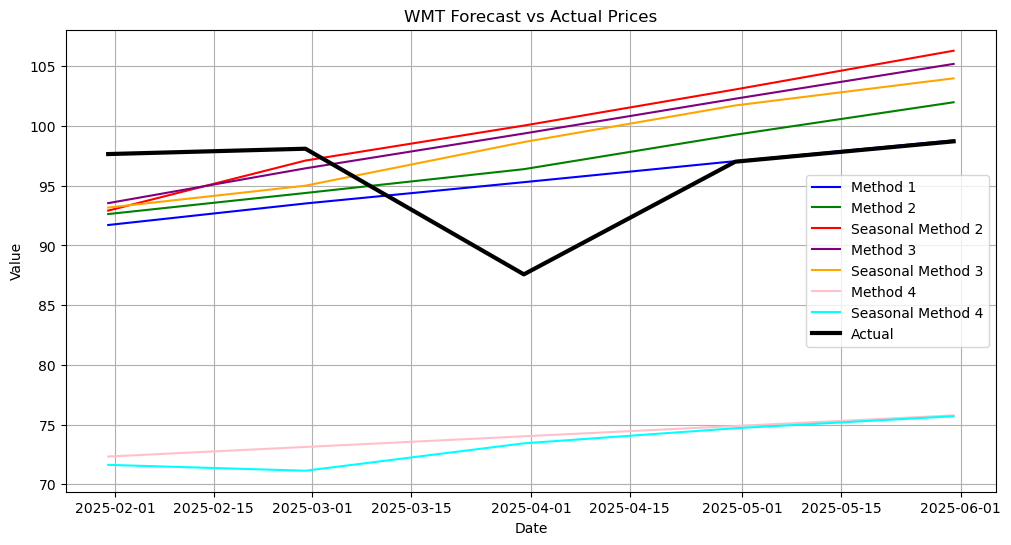

In [329]:
wmt_forecasts = [m1_wmt_forecast, m2_wmt_forecast, sm2_wmt_forecast, 
                 m3_wmt_forecast, sm3_wmt_forecast, m4_wmt_forecast, sm4_wmt_forecast]
plot_forecast(wmt_forecasts,curr_wmt_data.head(), 'WMT')

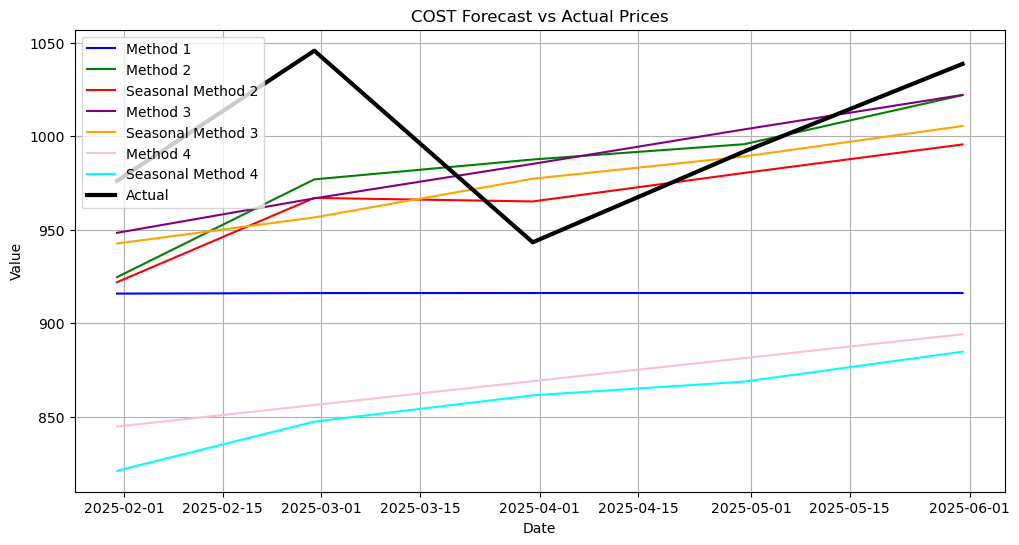

In [330]:
cost_forecasts = [m1_cost_forecast, m2_cost_forecast, sm2_cost_forecast, 
                  m3_cost_forecast, sm3_cost_forecast, m4_cost_forecast, sm4_cost_forecast]
plot_forecast(cost_forecasts, curr_cost_data.head(), 'COST')

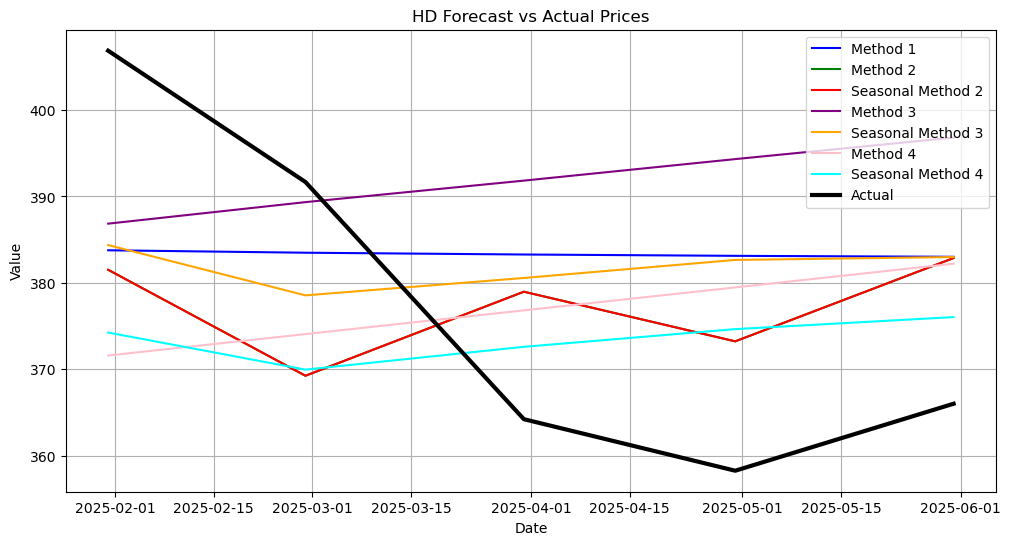

In [331]:
hd_forecasts = [m1_hd_forecast, m2_hd_forecast, sm2_hd_forecast, 
                m3_hd_forecast, sm3_hd_forecast, m4_hd_forecast, sm4_hd_forecast]
plot_forecast(hd_forecasts, curr_hd_data.head(), 'HD')

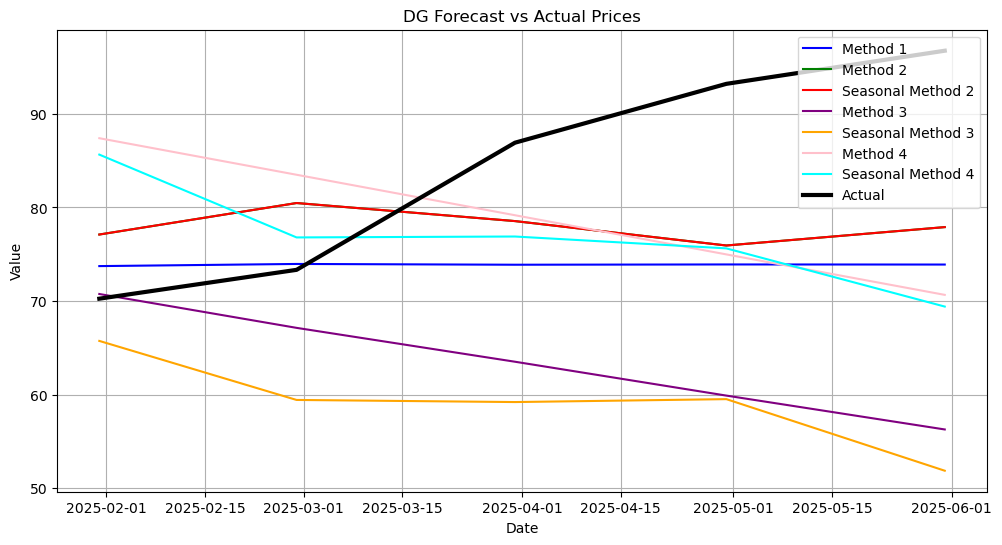

In [332]:
dg_forecasts = [m1_dg_forecast, m2_dg_forecast, sm2_dg_forecast, 
                m3_dg_forecast, sm3_dg_forecast, m4_dg_forecast, sm4_dg_forecast]
plot_forecast(dg_forecasts, curr_dg_data.head(), 'DG')

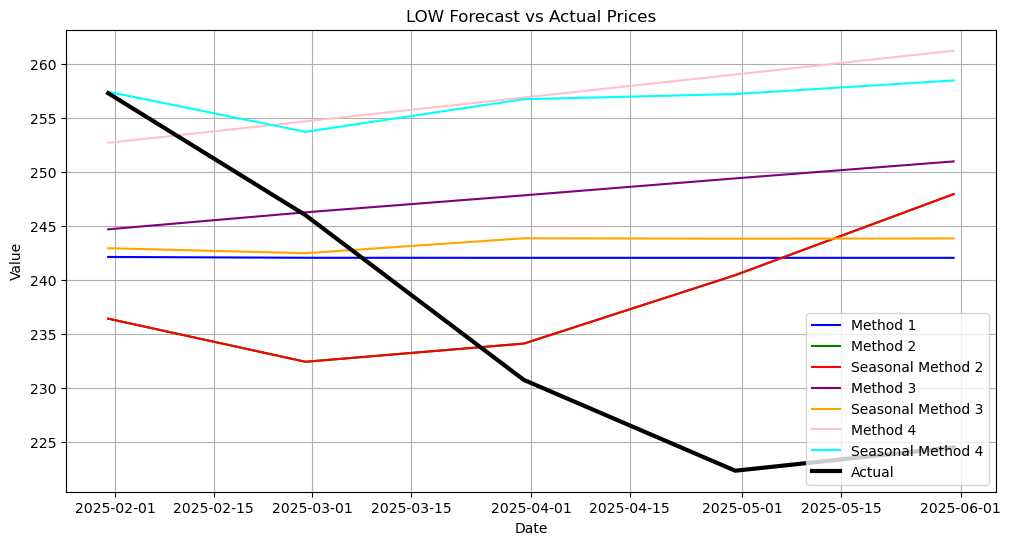

In [333]:
low_forecasts = [m1_low_forecast, m2_low_forecast, sm2_low_forecast, 
                 m3_low_forecast, sm3_low_forecast, m4_low_forecast, sm4_low_forecast]
plot_forecast(low_forecasts, curr_low_data.head(), 'LOW')

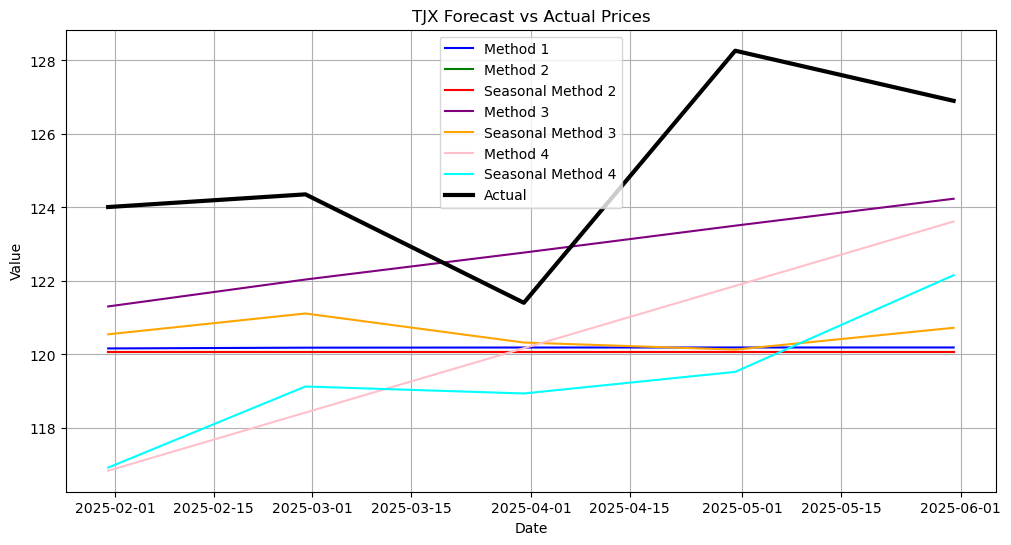

In [334]:
tjx_forecasts = [m1_tjx_forecast, m2_tjx_forecast, sm2_tjx_forecast, 
                 m3_tjx_forecast, sm3_tjx_forecast, m4_tjx_forecast, sm4_tjx_forecast]
plot_forecast(tjx_forecasts, curr_tjx_data.head(), 'TJX')

# Calculate the Root Mean Squared Error (RMSE) of Each Method

In [72]:
def calculate_rmse(predicted, actual):
    return np.sqrt(mean_squared_error(actual, predicted))

In [275]:
wmt_rmse = {
    'Method 1': calculate_rmse(m1_wmt_forecast, curr_wmt_data.head()),
    'Method 2': calculate_rmse(m2_wmt_forecast, curr_wmt_data.head()),
    'Seasonal Method 2': calculate_rmse(sm2_wmt_forecast, curr_wmt_data.head()),
    'Method 3': calculate_rmse(m3_wmt_forecast, curr_wmt_data.head()),
    'Seasonal Method 3': calculate_rmse(sm3_wmt_forecast, curr_wmt_data.head()),
    'Method 4': calculate_rmse(m4_wmt_forecast, curr_wmt_data.head()),
    'Seasonal Method 4': calculate_rmse(sm4_wmt_forecast, curr_wmt_data.head())
}
wmt_rmse

{'Method 1': 4.81649609963026,
 'Method 2': 5.147210768836441,
 'Seasonal Method 2': 7.389026627479966,
 'Method 3': 6.762880940199613,
 'Seasonal Method 3': 6.365248783089055,
 'Method 4': 22.213666935870666,
 'Seasonal Method 4': 22.9536814803926}

In [276]:
tgt_rmse = {
    'Method 1': calculate_rmse(m1_tgt_forecast, curr_tgt_data.head()),
    'Method 2': calculate_rmse(m2_tgt_forecast, curr_tgt_data.head()),
    'Seasonal Method 2': calculate_rmse(sm2_tgt_forecast, curr_tgt_data.head()),
    'Method 3': calculate_rmse(m3_tgt_forecast, curr_tgt_data.head()),
    'Seasonal Method 3': calculate_rmse(sm3_tgt_forecast, curr_tgt_data.head()),
    'Method 4': calculate_rmse(m4_tgt_forecast, curr_tgt_data.head()),
    'Seasonal Method 4': calculate_rmse(sm4_tgt_forecast, curr_tgt_data.head())
}
tgt_rmse

{'Method 1': 26.40011436015101,
 'Method 2': 25.53081977136583,
 'Seasonal Method 2': 25.53081977136583,
 'Method 3': 29.877070700845547,
 'Seasonal Method 3': 29.640316164555966,
 'Method 4': 66.35364464854193,
 'Seasonal Method 4': 65.00828224551505}

In [277]:
cost_rmse = {
    'Method 1': calculate_rmse(m1_cost_forecast, curr_cost_data.head()),
    'Method 2': calculate_rmse(m2_cost_forecast, curr_cost_data.head()),
    'Seasonal Method 2': calculate_rmse(sm2_cost_forecast, curr_cost_data.head()),
    'Method 3': calculate_rmse(m3_cost_forecast, curr_cost_data.head()),
    'Seasonal Method 3': calculate_rmse(sm3_cost_forecast, curr_cost_data.head()),
    'Method 4': calculate_rmse(m4_cost_forecast, curr_cost_data.head()),
    'Seasonal Method 4': calculate_rmse(sm4_cost_forecast, curr_cost_data.head())
}
cost_rmse

{'Method 1': 91.63788246941472,
 'Method 2': 43.95876276421207,
 'Seasonal Method 2': 48.20938736139858,
 'Method 3': 42.894847166333776,
 'Seasonal Method 3': 47.66627485982997,
 'Method 4': 135.62386853437016,
 'Seasonal Method 4': 147.72524514125536}

In [278]:
hd_rmse = {
    'Method 1': calculate_rmse(m1_hd_forecast, curr_hd_data.head()),
    'Method 2': calculate_rmse(m2_hd_forecast, curr_hd_data.head()),
    'Seasonal Method 2': calculate_rmse(sm2_hd_forecast, curr_hd_data.head()),
    'Method 3': calculate_rmse(m3_hd_forecast, curr_hd_data.head()),
    'Seasonal Method 3': calculate_rmse(sm3_hd_forecast, curr_hd_data.head()),
    'Method 4': calculate_rmse(m4_hd_forecast, curr_hd_data.head()),
    'Seasonal Method 4': calculate_rmse(sm4_hd_forecast, curr_hd_data.head())
}
hd_rmse

{'Method 1': 19.3383062205157,
 'Method 2': 19.34122804198642,
 'Seasonal Method 2': 19.34122804198642,
 'Method 3': 26.134364006577915,
 'Seasonal Method 3': 19.11607305622327,
 'Method 4': 22.0162076002054,
 'Seasonal Method 4': 19.863348055891333}

In [279]:
dg_rmse = {
    'Method 1': calculate_rmse(m1_dg_forecast, curr_dg_data.head()),
    'Method 2': calculate_rmse(m2_dg_forecast, curr_dg_data.head()),
    'Seasonal Method 2': calculate_rmse(sm2_dg_forecast, curr_dg_data.head()),
    'Method 3': calculate_rmse(m3_dg_forecast, curr_dg_data.head()),
    'Seasonal Method 3': calculate_rmse(sm3_dg_forecast, curr_dg_data.head()),
    'Method 4': calculate_rmse(m4_dg_forecast, curr_dg_data.head()),
    'Seasonal Method 4': calculate_rmse(sm4_dg_forecast, curr_dg_data.head())
}
dg_rmse

{'Method 1': 14.684608033313932,
 'Method 2': 12.826569305491674,
 'Seasonal Method 2': 12.826569305491674,
 'Method 3': 25.836472408207964,
 'Seasonal Method 3': 28.759129711366707,
 'Method 4': 17.15623562862012,
 'Seasonal Method 4': 16.777939860367784}

In [280]:
low_rmse = {
    'Method 1': calculate_rmse(m1_low_forecast, curr_low_data.head()),
    'Method 2': calculate_rmse(m2_low_forecast, curr_low_data.head()),
    'Seasonal Method 2': calculate_rmse(sm2_low_forecast, curr_low_data.head()),
    'Method 3': calculate_rmse(m3_low_forecast, curr_low_data.head()),
    'Seasonal Method 3': calculate_rmse(sm3_low_forecast, curr_low_data.head()),
    'Method 4': calculate_rmse(m4_low_forecast, curr_low_data.head()),
    'Seasonal Method 4': calculate_rmse(sm4_low_forecast, curr_low_data.head())
}
low_rmse

{'Method 1': 14.616923809653782,
 'Method 2': 17.361078305069412,
 'Seasonal Method 2': 17.361078305069412,
 'Method 3': 19.401339060115543,
 'Seasonal Method 3': 15.649057305050862,
 'Method 4': 26.343902162282173,
 'Seasonal Method 4': 24.904751507533444}

In [281]:
tjx_rmse = {
    'Method 1': calculate_rmse(m1_tjx_forecast, curr_tjx_data.head()),
    'Method 2': calculate_rmse(m2_tjx_forecast, curr_tjx_data.head()),
    'Seasonal Method 2': calculate_rmse(sm2_tjx_forecast, curr_tjx_data.head()),
    'Method 3': calculate_rmse(m3_tjx_forecast, curr_tjx_data.head()),
    'Seasonal Method 3': calculate_rmse(sm3_tjx_forecast, curr_tjx_data.head()),
    'Method 4': calculate_rmse(m4_tjx_forecast, curr_tjx_data.head()),
    'Seasonal Method 4': calculate_rmse(sm4_tjx_forecast, curr_tjx_data.head())
}
tjx_rmse

{'Method 1': 5.364072711595163,
 'Method 2': 5.480181442016719,
 'Seasonal Method 2': 5.480181442016719,
 'Method 3': 2.976282727811772,
 'Seasonal Method 3': 5.057805051589736,
 'Method 4': 5.2898368368012925,
 'Seasonal Method 4': 6.041468696606247}

# Calculate the statisical difference between seasonal vs. non-seasonal

In [285]:
all_rsme=[wmt_rmse, tgt_rmse, cost_rmse, hd_rmse, dg_rmse, low_rmse, tjx_rmse]

In [286]:
method_2_rmse = [rmse['Method 2'] for rmse in all_rsme]
seasonal_method_2_rmse = [rmse['Seasonal Method 2'] for rmse in all_rsme]

differences = np.array(method_2_rmse) - np.array(seasonal_method_2_rmse)
t_stat2, p_value2 = stats.ttest_1samp(differences, 0)
print(f"T-statistic: {t_stat2}")
print(f"P-value: {p_value2}")

T-statistic: -1.4547692168321746
P-value: 0.19597039215677495


In [287]:
method_3_rmse = [rmse['Method 3'] for rmse in all_rsme]
seasonal_method_3_rmse = [rmse['Seasonal Method 3'] for rmse in all_rsme]

differences = np.array(method_3_rmse) - np.array(seasonal_method_3_rmse)
t_stat3, p_value3 = stats.ttest_1samp(differences, 0)
print(f"T-statistic: {t_stat3}")
print(f"P-value: {p_value3}")

T-statistic: 0.1517527046230906
P-value: 0.8843560039004554


In [288]:
method_4_rmse = [rmse['Method 4'] for rmse in all_rsme]
seasonal_method_4_rmse = [rmse['Seasonal Method 4'] for rmse in all_rsme]

differences = np.array(method_4_rmse) - np.array(seasonal_method_4_rmse)
t_stat4, p_value4 = stats.ttest_1samp(differences, 0)
print(f"T-statistic: {t_stat4}")
print(f"P-value: {p_value4}")

T-statistic: -0.6332968923112268
P-value: 0.5499013732121729


# Statistics of each method

In [297]:
df_list = [pd.DataFrame([d], index=[name]) for d, name in zip(all_rsme, tickers)]
rmse_table = pd.concat(df_list)
rmse_table.describe()

,Method 1,Method 2,Seasonal Method 2,Method 3,Seasonal Method 3,Method 4,Seasonal Method 4
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,25.265486,18.520836,19.448327,21.983322,21.750558,42.142480,43.324960
std,30.224957,13.413819,14.450761,13.731212,14.958372,45.385753,49.613723
min,4.816496,5.147211,5.480181,2.976283,5.057805,5.289837,6.041469
25%,9.990498,9.153375,10.107798,13.082110,11.007153,19.586222,18.320644
50%,14.684608,17.361078,17.361078,25.836472,19.116073,22.213667,22.953681
75%,22.869210,22.436024,22.436024,28.005717,29.199723,46.348773,44.956517
max,91.637882,43.958763,48.209387,42.894847,47.666275,135.623869,147.725245
